In [1]:
%matplotlib inline
import numpy as np
from dirmult.tests.utils import *
from dirmult.tests.implementation import *

First we define some parameters are used to generate fake data that exhibit missingness. We do this by calling the 'generate_fake_counts' function from test.utils:

In [2]:
n = 25
k = 5
n_nan = 35
true_alpha = np.random.uniform(3,20,k) 
prior = np.array([10.]*k)
counts = generate_fake_counts(true_alpha, (15,25), n, n_nan)
print "expected value of true probabilities: {} \n".format(true_alpha / true_alpha.sum())
print "simulated data:\n{}".format(counts)

expected value of true probabilities: [ 0.1904464   0.17293133  0.22169827  0.11555134  0.29937266] 

simulated data:
[[  5.   3.   5.   4.  nan]
 [  2.   2.   4.   4.  11.]
 [ nan  nan  11.  nan  10.]
 [  5.  nan  19.  nan  nan]
 [ nan   5.   3.   3.   8.]
 [ nan   6.   7.  nan   6.]
 [  5.   1.   8.  nan   9.]
 [  6.  nan  12.   4.  nan]
 [  4.   5.   3.   3.  nan]
 [ nan   7.   8.  nan   6.]
 [  6.   5.   3.  nan   4.]
 [  9.  nan   8.   2.   2.]
 [  2.   4.   6.  nan  11.]
 [ nan   8.  nan  14.  nan]
 [  5.   6.   3.   5.   5.]
 [ nan   3.   8.   5.   8.]
 [  5.   2.  nan   0.  11.]
 [ 11.   8.  nan   4.  nan]
 [ nan   5.   2.   3.  10.]
 [  2.   9.   7.  nan  nan]
 [ nan  nan   9.   1.  11.]
 [  3.   1.   4.   6.   5.]
 [  3.  nan   6.   1.   6.]
 [ nan  15.   7.   0.  nan]
 [  2.   5.  nan   6.   7.]]


In [3]:
MHTest = MetropolisHastingsTest(counts, prior, 100000, beta = 250)
print MHTest.cython_chain['acceptance_rate']
print MHTest.python_chain['acceptance_rate']

0.22472
0.22369


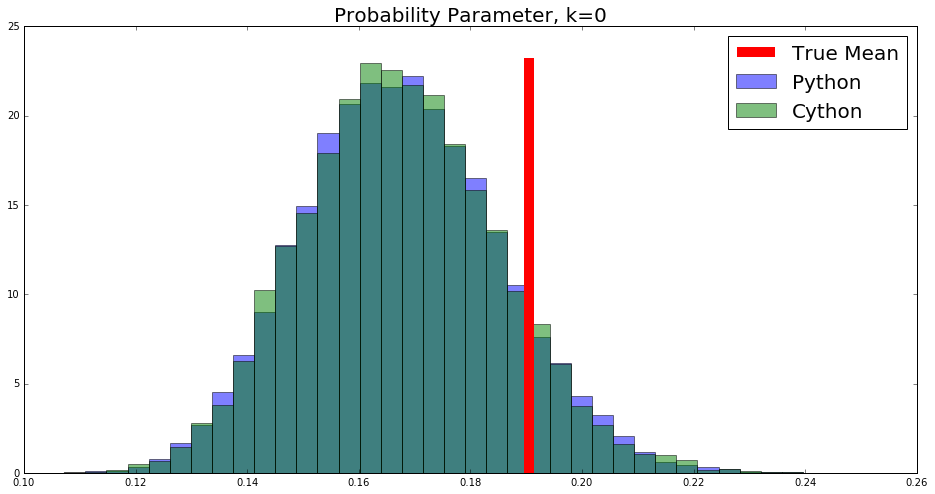

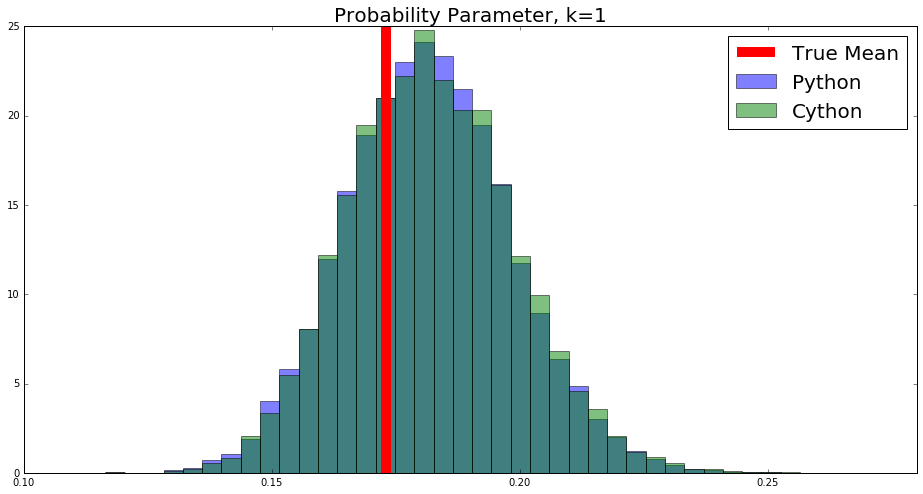

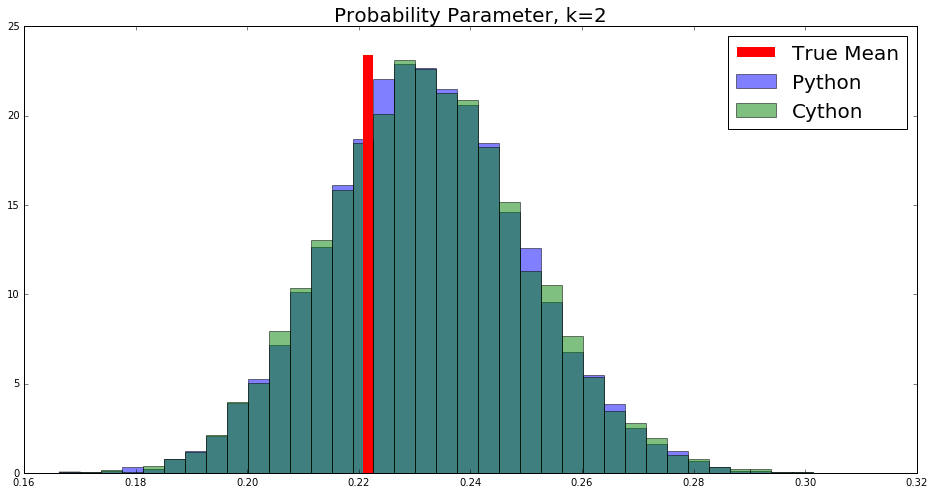

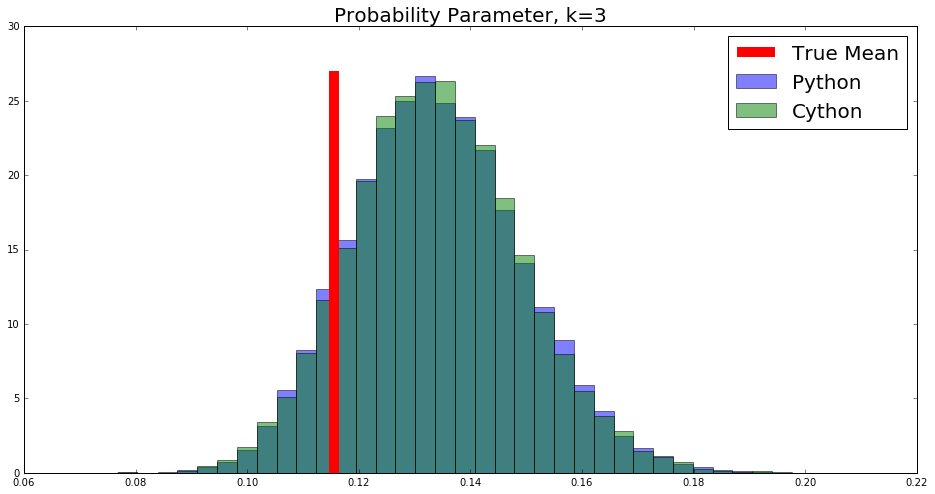

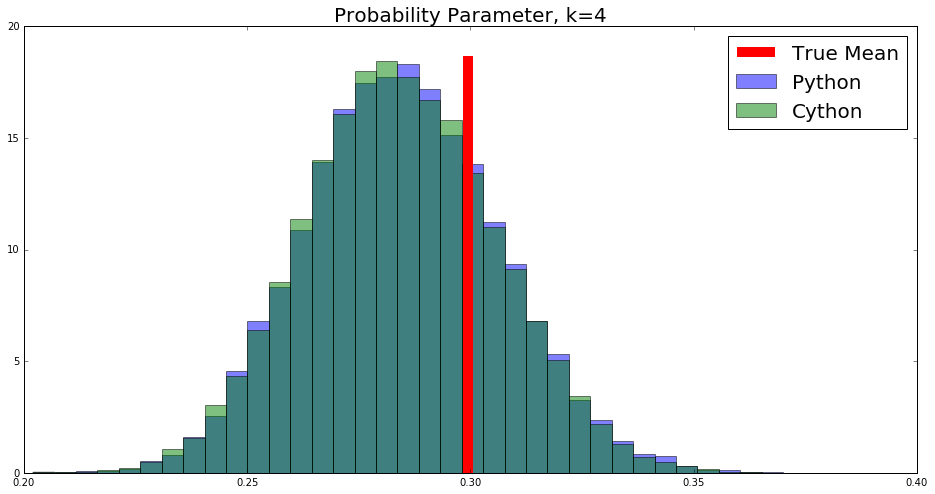

In [4]:
MHTest.plots(true_alpha)

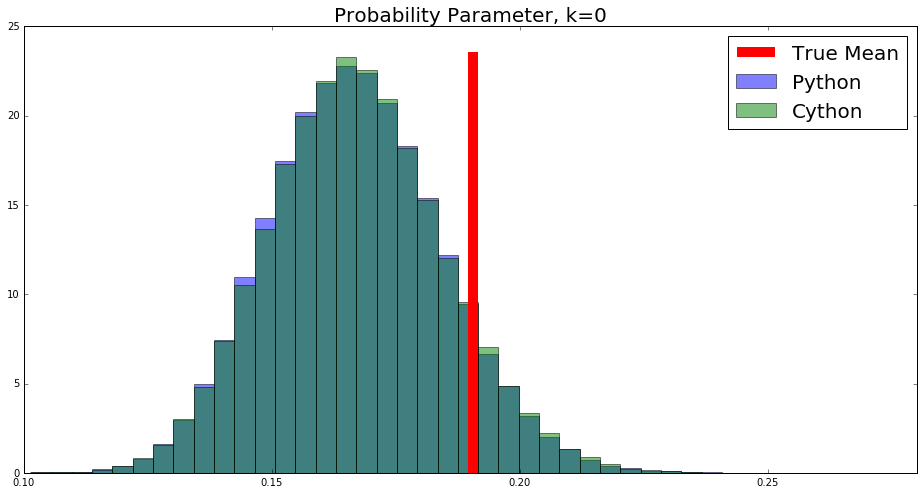

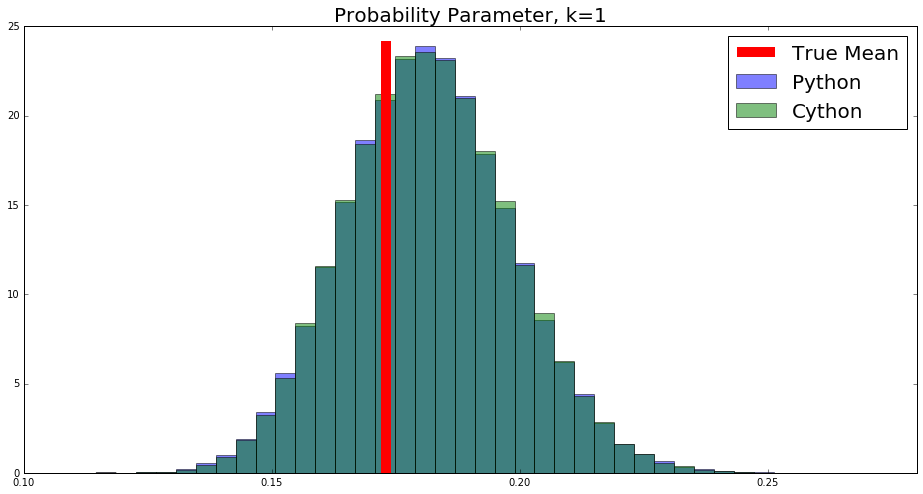

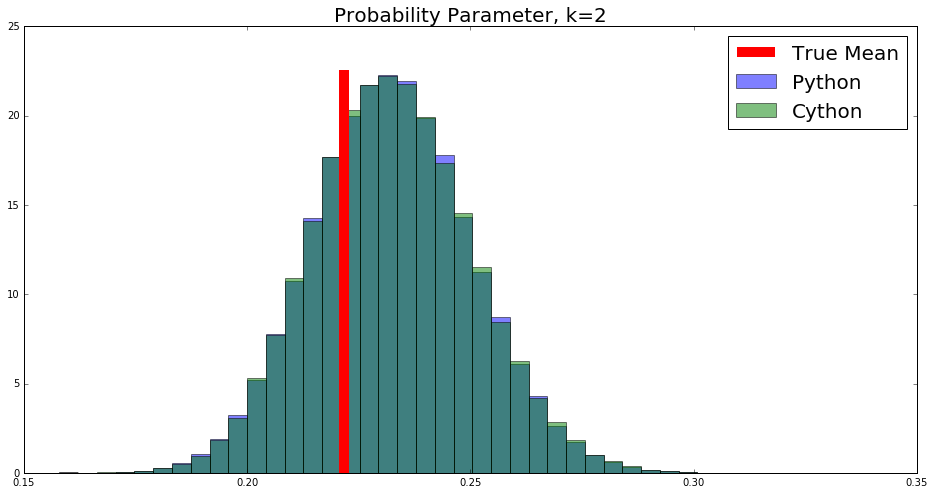

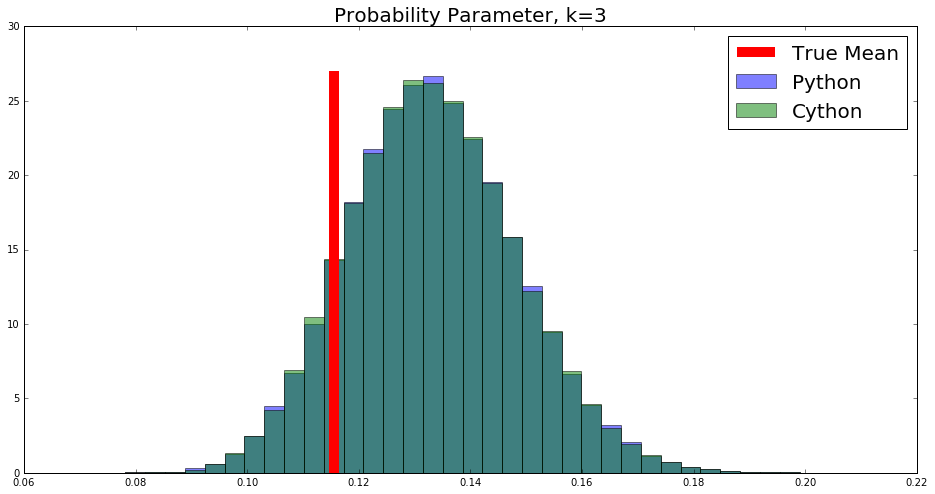

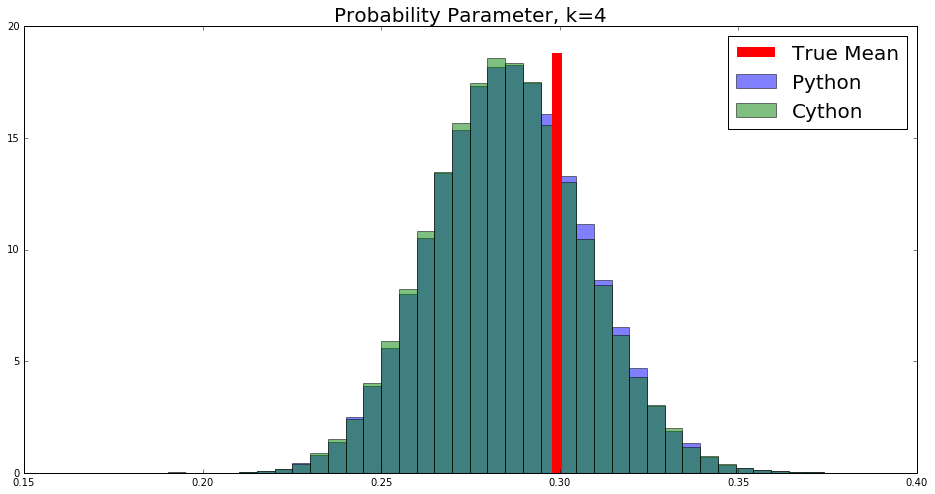

In [5]:
AGTest = AugmentedGibbsTest(counts, prior, 100000)
AGTest.plots(true_alpha)

After confirming the correctness of the respective Cython implementations, we compare the two different methods. We find that they arrive at similar answers. With the Augmented Gibbs model, we do not have to set a hyperparameter in order to achieve good mixing.

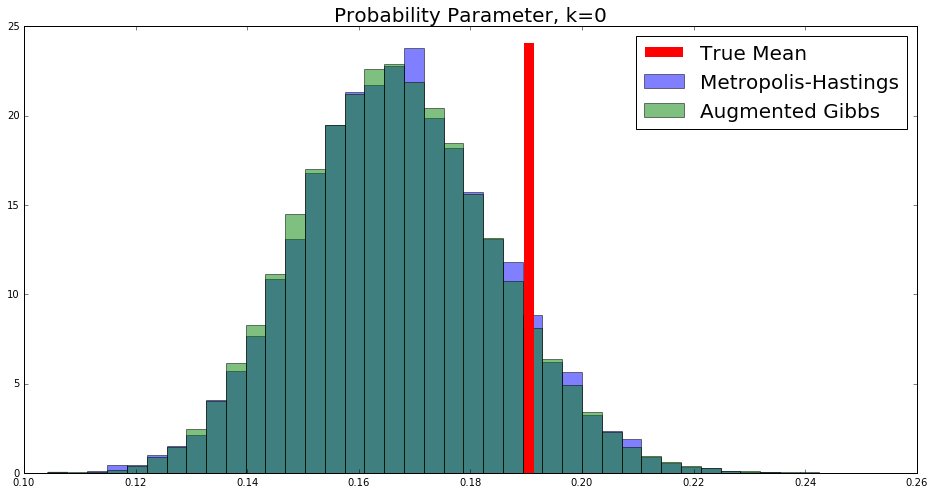

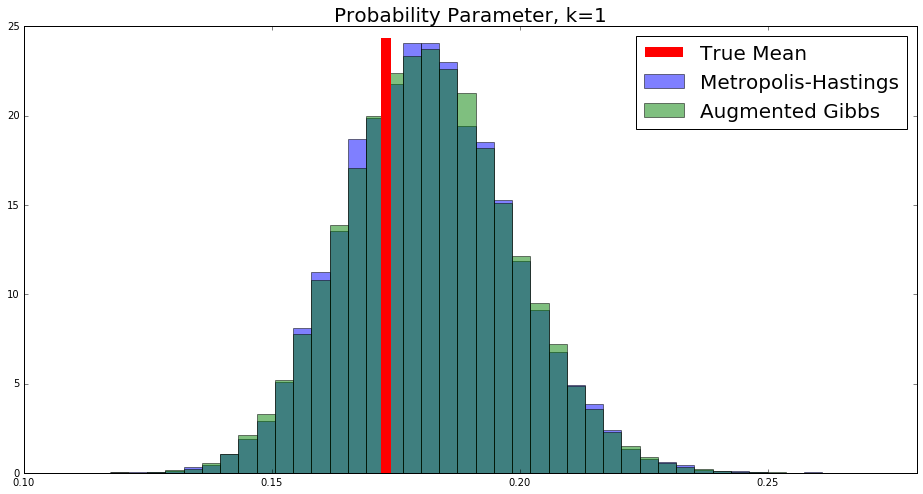

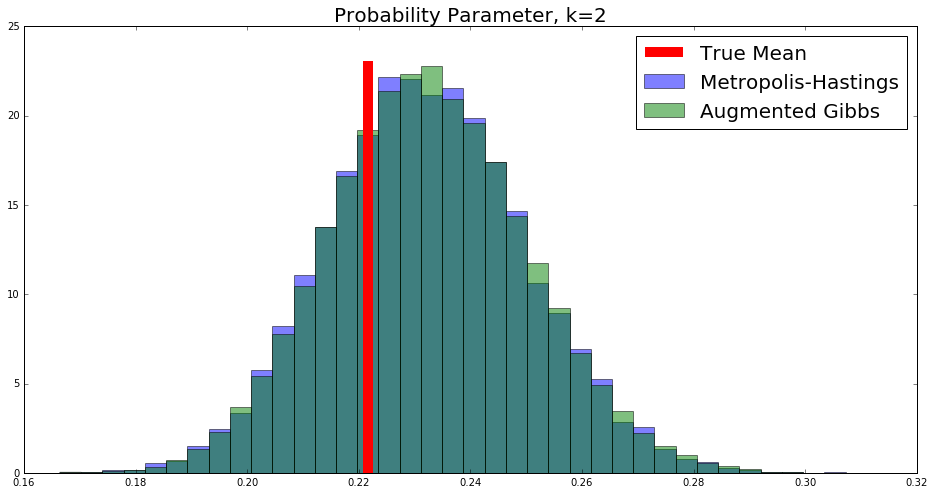

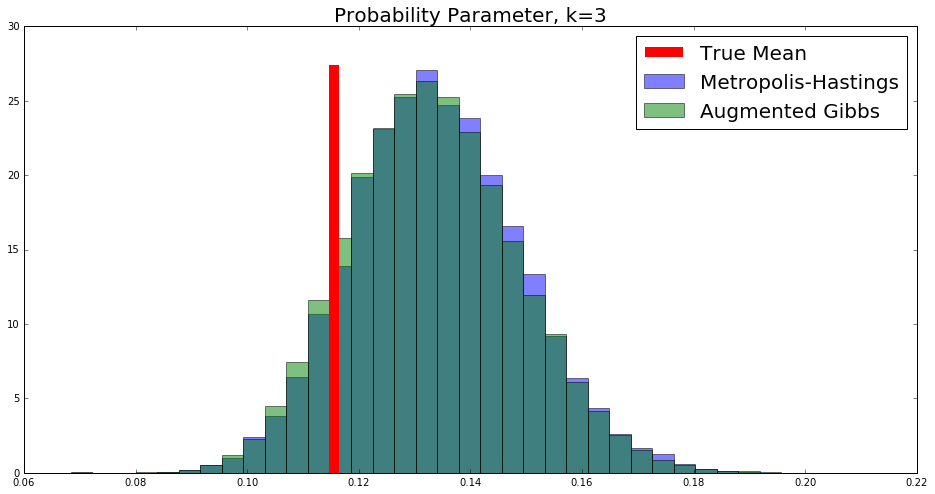

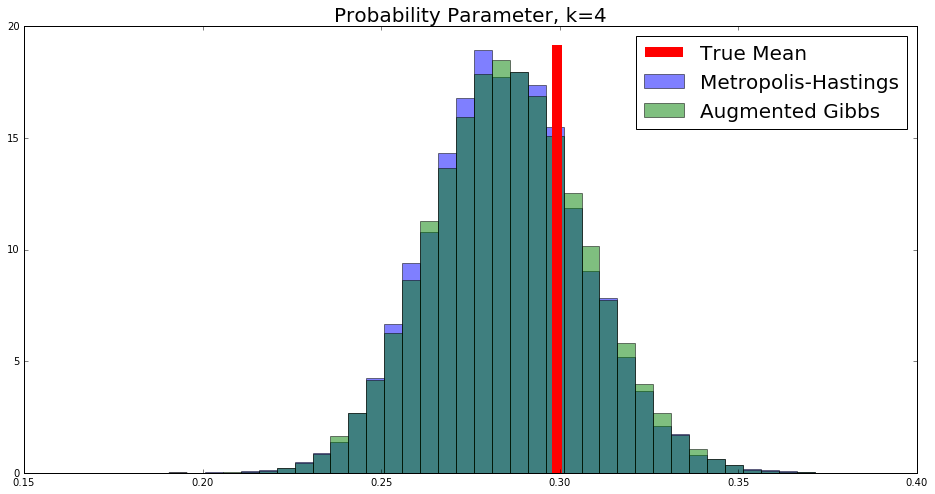

In [6]:
XTest = MethodCrosscheck(counts, prior, repl = 100000, burn = 50, beta = MHTest.beta)
XTest.plots(true_alpha)